QUESTION:
Build ML models based on ensemble learning techniques like, voting classification , bagging, random forest classification.

In [1]:
# Import the necessary dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the dataset 
data = pd.read_csv(r"C:\Users\Dell\Desktop\program files\MLAIfiles\loan_data.csv")

In [3]:
data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [4]:
data.tail()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
116053,382119962287,Y,Browning-Hart,4.125,153000,360,2012-02-01,04/2012,88,2.0,...,0,0,0,0,0,0,0,0,0,0
116054,582803915466,Z,OTHER,3.000,150000,120,2012-01-01,03/2012,35,1.0,...,0,0,0,0,0,0,0,0,0,0
116055,837922316947,X,OTHER,3.875,166000,360,2012-02-01,04/2012,58,2.0,...,0,0,0,0,0,0,0,0,0,0
116056,477343182138,X,OTHER,4.250,169000,360,2012-02-01,04/2012,74,2.0,...,0,0,0,0,0,0,0,0,0,0
116057,763308490661,Z,Thornton-Davis,3.375,252000,180,2012-01-01,03/2012,29,2.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.shape

(116058, 29)

In [6]:
data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [7]:
data.isna().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_id                   116058 non-null  int64  
 1   source                    116058 non-null  object 
 2   financial_institution     116058 non-null  object 
 3   interest_rate             116058 non-null  float64
 4   unpaid_principal_bal      116058 non-null  int64  
 5   loan_term                 116058 non-null  int64  
 6   origination_date          116058 non-null  object 
 7   first_payment_date        116058 non-null  object 
 8   loan_to_value             116058 non-null  int64  
 9   number_of_borrowers       116058 non-null  float64
 10  debt_to_income_ratio      116058 non-null  float64
 11  borrower_credit_score     116058 non-null  float64
 12  loan_purpose              116058 non-null  object 
 13  insurance_percent         116058 non-null  f

In [9]:
data = data.dropna()

In [10]:
data.isna().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [11]:
data['source'].value_counts()

X    63858
Y    37554
Z    14646
Name: source, dtype: int64

In [12]:
data['financial_institution'].nunique()

19

In [13]:
data['financial_institution'].value_counts(normalize = True) * 100

OTHER                          42.822554
Browning-Hart                  27.444898
Swanson, Newton and Miller      5.922901
Edwards-Hoffman                 4.184976
Martinez, Duffy and Bird        4.062624
Miller, Mcclure and Allen       2.721053
Nicholson Group                 1.823226
Turner, Baldwin and Rhodes      1.590584
Suarez Inc                      1.542332
Cole, Brooks and Vincent        1.414810
Richards-Walters                1.257130
Taylor, Hunt and Rodriguez      1.084802
Sanchez-Robinson                1.027934
Sanchez, Hays and Wilkerson     0.734977
Romero, Woods and Johnson       0.646229
Thornton-Davis                  0.560926
Anderson-Taylor                 0.416171
Richardson Ltd                  0.407555
Chapman-Mcmahon                 0.334316
Name: financial_institution, dtype: float64

In [14]:
data['interest_rate'].describe()

count    116058.000000
mean          3.868961
std           0.461020
min           2.250000
25%           3.500000
50%           3.875000
75%           4.125000
max           6.750000
Name: interest_rate, dtype: float64

In [15]:
import matplotlib.pyplot as plt

The interrate rate values not extreme

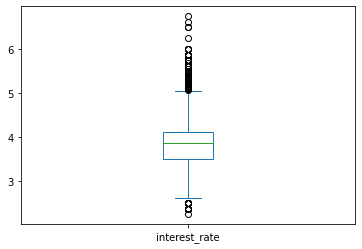

In [16]:
data['interest_rate'].plot(kind="box")
plt.show()

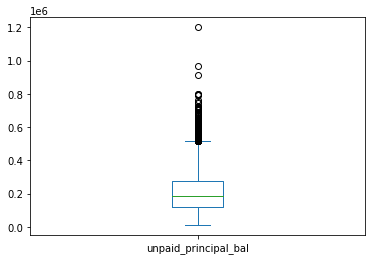

In [17]:
data['unpaid_principal_bal'].plot(kind="box")
plt.show()

In [18]:
data['unpaid_principal_bal'].describe().round()

count     116058.0
mean      208226.0
std       114685.0
min        11000.0
25%       120000.0
50%       183000.0
75%       278000.0
max      1200000.0
Name: unpaid_principal_bal, dtype: float64

In [19]:
data[data['unpaid_principal_bal'] > 1000000].index

Int64Index([84135], dtype='int64')

In [20]:
data = data.drop(84135)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116057 entries, 0 to 116057
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_id                   116057 non-null  int64  
 1   source                    116057 non-null  object 
 2   financial_institution     116057 non-null  object 
 3   interest_rate             116057 non-null  float64
 4   unpaid_principal_bal      116057 non-null  int64  
 5   loan_term                 116057 non-null  int64  
 6   origination_date          116057 non-null  object 
 7   first_payment_date        116057 non-null  object 
 8   loan_to_value             116057 non-null  int64  
 9   number_of_borrowers       116057 non-null  float64
 10  debt_to_income_ratio      116057 non-null  float64
 11  borrower_credit_score     116057 non-null  float64
 12  loan_purpose              116057 non-null  object 
 13  insurance_percent         116057 non-null  f

In [22]:
data['loan_term'].describe()

count    116057.000000
mean        292.281965
std          89.762196
min          60.000000
25%         180.000000
50%         360.000000
75%         360.000000
max         360.000000
Name: loan_term, dtype: float64

In [23]:
data['loan_to_value'].describe()   #### 0 to 100

count    116057.000000
mean         67.432098
std          17.291709
min           6.000000
25%          57.000000
50%          72.000000
75%          80.000000
max          97.000000
Name: loan_to_value, dtype: float64

<AxesSubplot:>

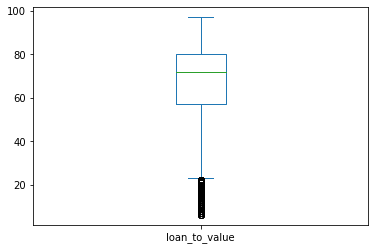

In [24]:
data['loan_to_value'].plot(kind="box")

In [25]:
data[data['loan_to_value'] < 7]

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
3809,778482838695,X,OTHER,4.375,100000,360,2012-01-01,03/2012,6,2.0,...,0,0,0,0,0,0,0,0,0,0
49086,347923793768,X,OTHER,3.875,134000,360,2012-02-01,04/2012,6,2.0,...,0,0,0,0,0,0,0,0,0,0
81533,636086390929,X,OTHER,4.000,42000,360,2012-02-01,04/2012,6,1.0,...,0,0,0,0,0,0,0,0,0,0
103748,338955015756,Z,Browning-Hart,3.375,81000,180,2012-01-01,03/2012,6,1.0,...,0,0,0,0,0,0,0,0,0,0
109443,162915736426,Y,Browning-Hart,3.500,90000,180,2012-01-01,03/2012,6,2.0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
data['debt_to_income_ratio'].describe()

count    116057.000000
mean         30.742135
std           9.730692
min           1.000000
25%          23.000000
50%          31.000000
75%          39.000000
max          64.000000
Name: debt_to_income_ratio, dtype: float64

In [27]:
data['borrower_credit_score'].describe()

count    116057.000000
mean        769.926545
std          42.210813
min           0.000000
25%         751.000000
50%         782.000000
75%         800.000000
max         840.000000
Name: borrower_credit_score, dtype: float64

<AxesSubplot:>

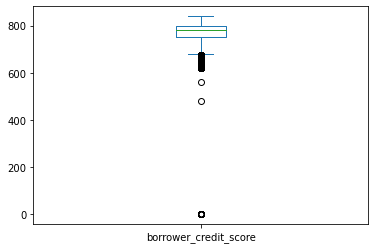

In [28]:
data['borrower_credit_score'].plot(kind = "box")

In [29]:
data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [30]:
repay_cols = ['m1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

In [31]:
zero_credit_index = data[data['borrower_credit_score'] < 400][repay_cols].index

In [32]:
data = data.drop(zero_credit_index)

In [33]:
data.shape

(116006, 29)

In [34]:
data['loan_purpose'].value_counts(normalize = True) * 100

A23    50.391359
B12    25.328000
C86    24.280641
Name: loan_purpose, dtype: float64

In [35]:
data['co-borrower_credit_score'].describe()

count    116006.000000
mean        459.714515
std         381.931527
min           0.000000
25%           0.000000
50%         740.000000
75%         791.000000
max         836.000000
Name: co-borrower_credit_score, dtype: float64

In [36]:
data['insurance_type'].value_counts()

0.0    115628
1.0       378
Name: insurance_type, dtype: int64

In [37]:
#### missing value and outliers is done

initial models , i would like to remove unnecessary ones

In [38]:
data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [39]:
req_cols = ['source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

In [40]:
x = data[req_cols]

In [41]:
y = data['m13']

In [42]:
y.value_counts(normalize = True) * 100

0    99.451752
1     0.548248
Name: m13, dtype: float64

In [43]:
x.columns

Index(['source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'loan_purpose', 'insurance_percent', 'co-borrower_credit_score',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12'],
      dtype='object')

In [44]:
x.shape

(116006, 25)

In [45]:
#### 19 financial institutions

In [46]:
x = pd.get_dummies(x)

In [47]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116006 entries, 0 to 116057
Data columns (total 47 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   interest_rate                                      116006 non-null  float64
 1   unpaid_principal_bal                               116006 non-null  int64  
 2   loan_term                                          116006 non-null  int64  
 3   loan_to_value                                      116006 non-null  int64  
 4   number_of_borrowers                                116006 non-null  float64
 5   debt_to_income_ratio                               116006 non-null  float64
 6   borrower_credit_score                              116006 non-null  float64
 7   insurance_percent                                  116006 non-null  float64
 8   co-borrower_credit_score                           116006 non-null  float6

In [48]:
x.describe()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,"financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
count,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,...,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000
mean,3.868913,208225.496957,292.271331,67.429314,1.593254,30.744539,770.265029,2.786330,459.714515,0.003258,...,0.007353,0.010284,0.015430,0.059256,0.010853,0.005612,0.015913,0.503914,0.253280,0.242806
std,0.460992,114654.925134,89.765255,17.293600,0.491229,9.729575,39.010395,8.096376,381.931527,0.056990,...,0.085435,0.100887,0.123257,0.236103,0.103611,0.074702,0.125139,0.499987,0.434892,0.428781
min,2.250000,11000.000000,60.000000,6.000000,1.000000,1.000000,480.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,120000.000000,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.875000,183000.000000,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,4.125000,278000.000000,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,6.750000,968000.000000,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
### extra featutres from the existing ones

In [50]:
x["total_credit_score"] = x['borrower_credit_score'] + x['co-borrower_credit_score']

In [51]:
x = x.drop(['borrower_credit_score','co-borrower_credit_score'], axis=1)

In [52]:
repay_cols = ['m1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

In [53]:
x["m_mean"] = x[repay_cols].mean(axis=1)

In [54]:
x[repay_cols].loc[3,repay_cols].kurt()

-1.6500000000000004

In [55]:
x["m_median"] = x[repay_cols].median(axis=1)

In [56]:
x["m_std"] = x[repay_cols].std(axis=1)

In [57]:
x["m_skew"] = x[repay_cols].skew(axis=1)

In [58]:
x["m_kurt"] = x[repay_cols].kurt(axis=1)

In [59]:
x.columns

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'insurance_percent',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'source_X', 'source_Y', 'source_Z',
       'financial_institution_Anderson-Taylor',
       'financial_institution_Browning-Hart',
       'financial_institution_Chapman-Mcmahon',
       'financial_institution_Cole, Brooks and Vincent',
       'financial_institution_Edwards-Hoffman',
       'financial_institution_Martinez, Duffy and Bird',
       'financial_institution_Miller, Mcclure and Allen',
       'financial_institution_Nicholson Group', 'financial_institution_OTHER',
       'financial_institution_Richards-Walters',
       'financial_institution_Richardson Ltd',
       'financial_institution_Romero, Woods and Johnson',
       'financial_institution_Sanchez, Hays and Wilkerson',
       'financial_institution_Sanchez-Robinson',


In [60]:
### standard scaling or min max scaling

#### i dont want to discturb the extreme points , just want to bring the data into smaller scale , i can go with min max

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
### assume i also want to go cross validation 

In [65]:
y.value_counts(normalize = True)

0    0.994518
1    0.005482
Name: m13, dtype: float64

In [66]:
y.value_counts()

0    115370
1       636
Name: m13, dtype: int64

In [67]:
### over sampling  

0 - 115370 , 1  115370 

In [68]:
#### under sampling

0 - 636, 1 - 636

In [69]:
#### 

 if consider we have enough data, i can can do the cross validation on the training data itself

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.2,
                                                    random_state = 345, 
                                                     stratify= y )

In [72]:
sc = MinMaxScaler()

In [73]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [74]:
###### evaluation metric     ### 0 - 99.5 1- 0.5

In [75]:
#### my model predicted all "1" class wrong

In [76]:
99.5 

99.5

In [77]:
### precison is not a metric,,, recall we need 

In [78]:
#### f1 score

In [79]:
#### i dont to loose the good customers, at the same time i dont want bad customers

In [80]:
#### equal priority for both 1 and 0

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lg = LogisticRegression(max_iter = 5000)

In [83]:
lg.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [84]:
y_pred = lg.predict(x_test)

In [108]:
from sklearn.metrics import f1_score, confusion_matrix, recall_score, accuracy_score

In [86]:
f1_score(y_test, y_pred)

0.4117647058823529

In [87]:
pd.Series(y_test).value_counts()

0    23075
1      127
Name: m13, dtype: int64

In [88]:
confusion_matrix(y_test, y_pred)

array([[23067,     8],
       [   92,    35]], dtype=int64)

In [89]:
#### it needs to be improved

In [90]:
recall_score(y_test, y_pred)

0.2755905511811024

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
knn = KNeighborsClassifier(n_neighbors=13)

In [93]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [94]:
y_pred = knn.predict(x_test)

In [95]:
f1_score(y_test, y_pred)

0.18309859154929575

In [96]:
confusion_matrix(y_test, y_pred)

array([[23073,     2],
       [  114,    13]], dtype=int64)

In [97]:
recall_score(y_test, y_pred)

0.10236220472440945

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
dt = DecisionTreeClassifier(max_depth= 8)

In [100]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [101]:
y_pred = dt.predict(x_test)

In [102]:
f1_score(y_test, y_pred)

0.12995245641838352

In [103]:
 #### logistic regression is performing good

In [104]:
### u need try ensemble learning techniques

# Voting classifier, bagging classifier, random forest classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [109]:
rf = RandomForestClassifier()

# create the voting classifier
vc = VotingClassifier(estimators=[('rf', rf)], voting='hard')
# fit the voting classifier to the training data
vc.fit(x_train, y_train)

# make predictions on the testing data
y_pred = vc.predict(x_test)

# calculate the accuracy of the voting classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9956469269890527


In [110]:
from sklearn.ensemble import BaggingClassifier

In [113]:
bagging_clf = BaggingClassifier(base_estimator=rf, n_estimators=10, random_state=42)
bagging_clf.fit(x_train, y_train)
y_pred = bagging_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)

C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy:  0.9959917248513059
